In [257]:
#import all the basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score



In [103]:
#reading data from day.csv 
rentals = pd.read_csv('day.csv')

# 1.Understanding Data

In [105]:
rentals.shape

(730, 16)

In [107]:
rentals.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [109]:
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [111]:
rentals.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [113]:
#Checking for null values in the given dataset
rentals.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [115]:
# Correcting data types

rentals[["instant","season","yr","mnth","holiday","weekday","workingday","weathersit"]] = rentals[["instant","season","yr","mnth","holiday","weekday","workingday","weathersit"]].astype(object)
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    object 
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(3), object(9)
memory usage: 91.4+ KB


In [117]:
rentals.mnth.value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [119]:
# Converting to Categorical Variables 
rentals['mnth'] = rentals['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [121]:
rentals.mnth.value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [123]:
rentals.weekday.value_counts()
rentals["weekday"] = rentals["weekday"].replace({0:"Sunday",1:'Monday',2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})


In [125]:
rentals.weekday.value_counts()


weekday
Saturday     105
Sunday       105
Monday       105
Tuesday      104
Thursday     104
Friday       104
Wednesday    103
Name: count, dtype: int64

In [127]:
rentals["weathersit"] = rentals["weathersit"].replace({1:"Clear + Partly Cloudy",2:"Mist + Cloudy",3:"Light Precipitation",4:"Heavy Precipitation"})
rentals.weathersit.value_counts()

weathersit
Clear + Partly Cloudy    463
Mist + Cloudy            246
Light Precipitation       21
Name: count, dtype: int64

In [129]:
rentals["season"] = rentals["season"].replace({1:'Spring',2:"Summer",3:"Fall",4:"Winter"})


In [131]:
rentals.season.value_counts()

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

In [133]:
rentals.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Saturday,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Sunday,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Monday,1,Clear + Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Tuesday,1,Clear + Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Wednesday,1,Clear + Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# 2. Visualising the Data
## 2.1.Bivariate Analysis : Numerical Vs Numerical 

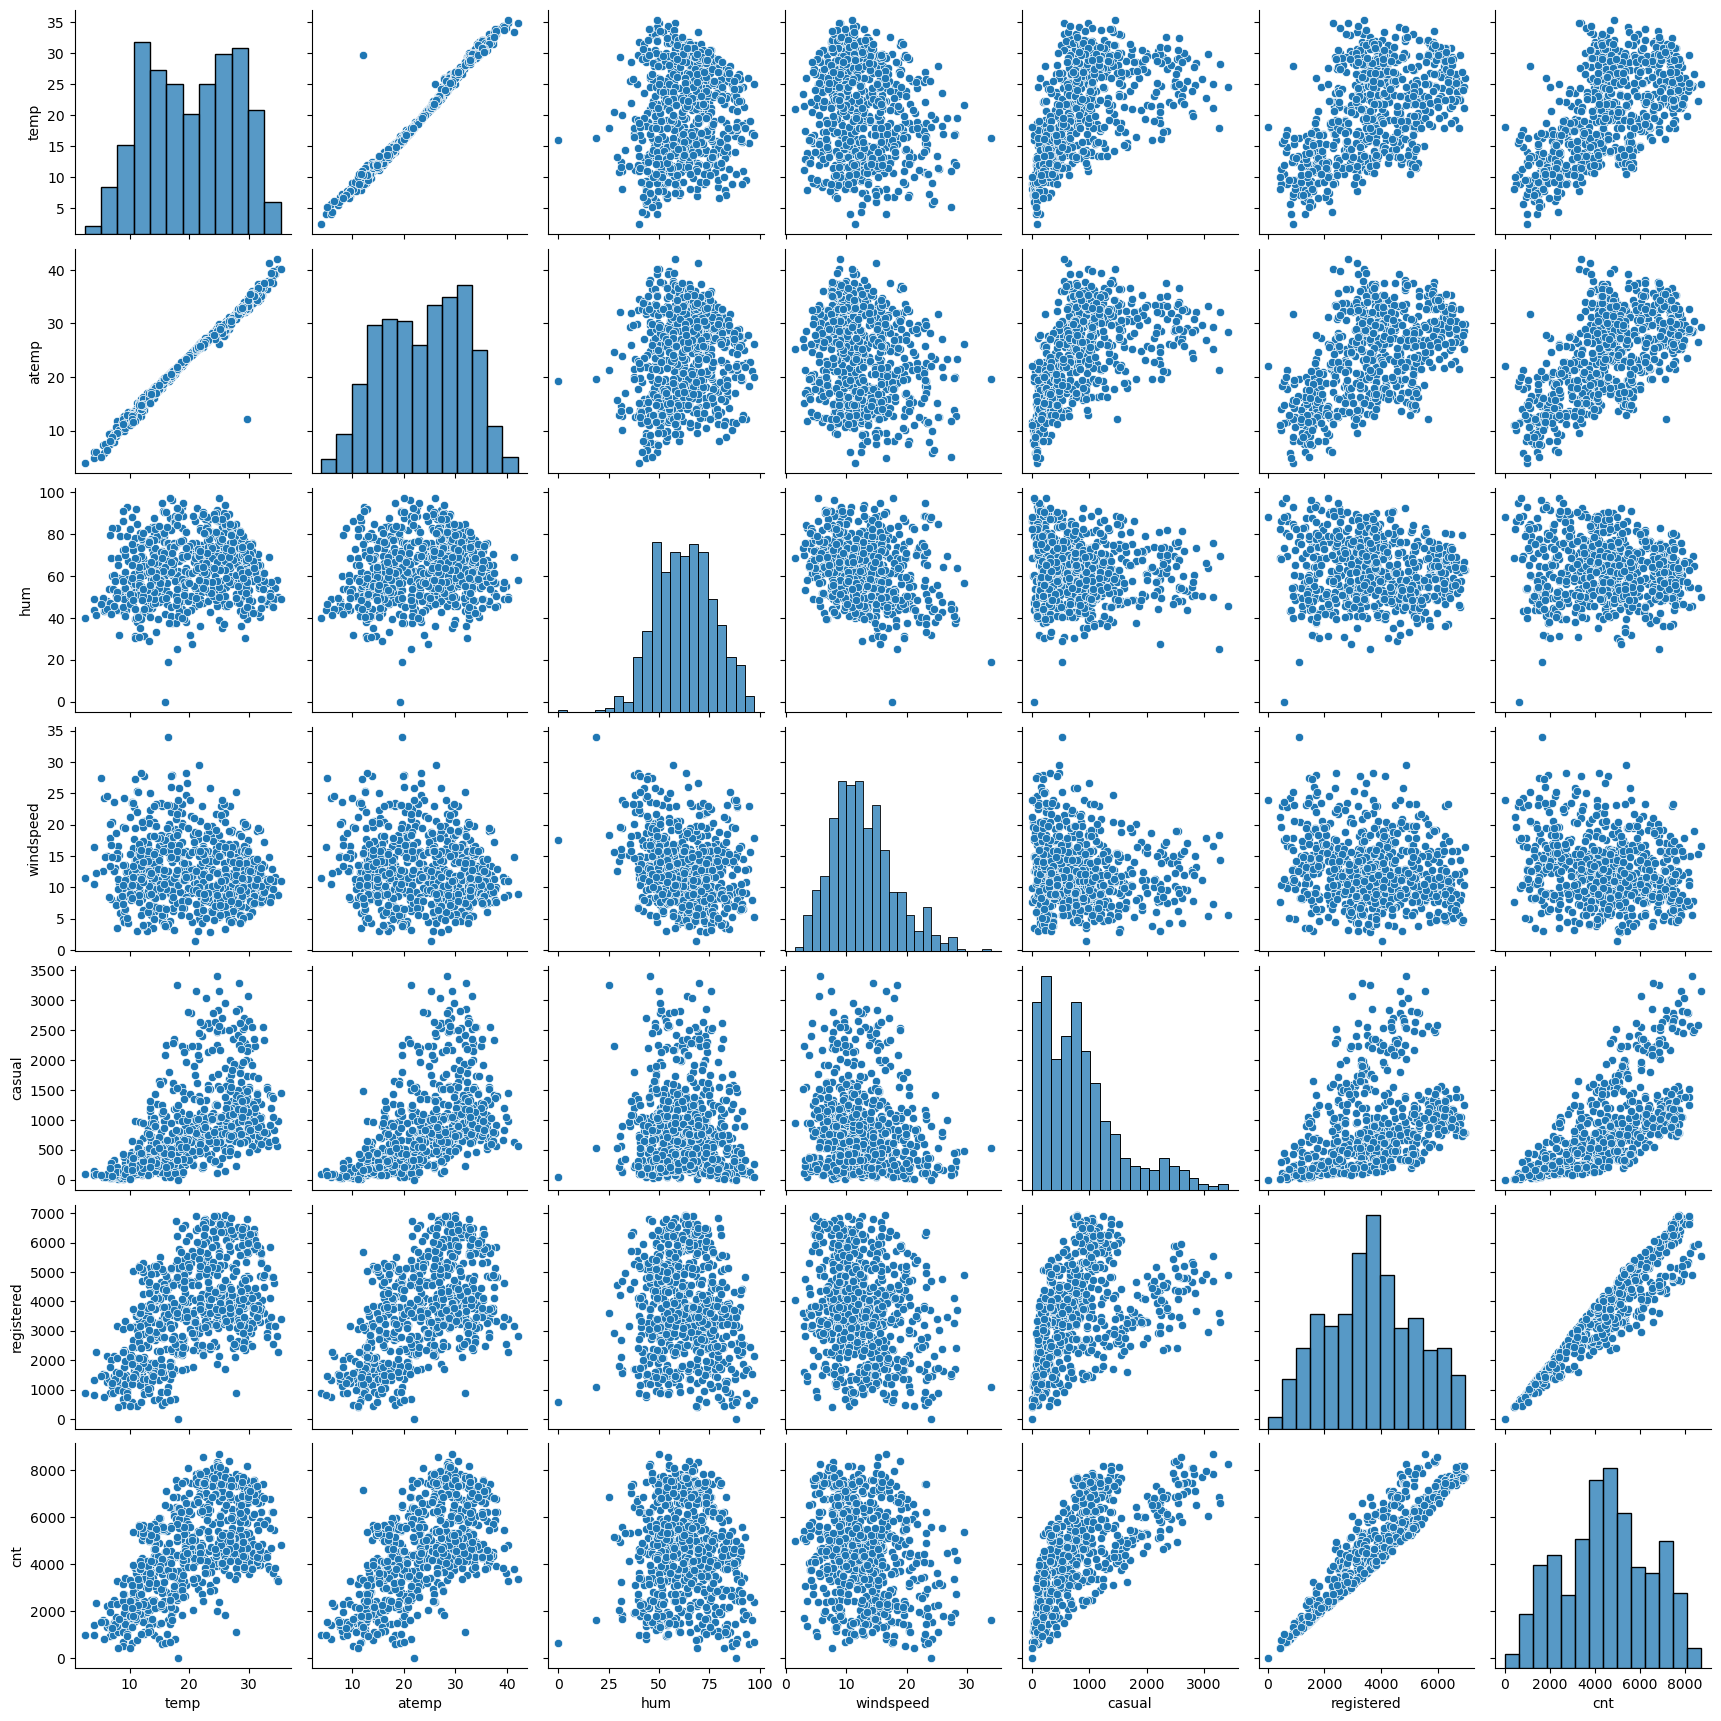

In [135]:
sns.pairplot(rentals[['temp','atemp','hum','windspeed','casual','registered','cnt']])
plt.show()

## Inferences from the above pairplot visualisation
1. temp and atemp seem to have a similar distribution. So, We can consider anyone of them. We will choose atemp because it makes more sense that 
    the customer opts for rental bikes based on the temperature how it actually feels like 
2. From the data dictionary, we can see that cnt is the sum of 'casual' and ' registered'. So, we can consider cnt as the target variable
3. We can observe that 'cnt' variable is seen to follow some linearity with other numeric variables. So, We will use linear regression model to predict the variable 'cnt'


## 2.2 Multivariate Analysis


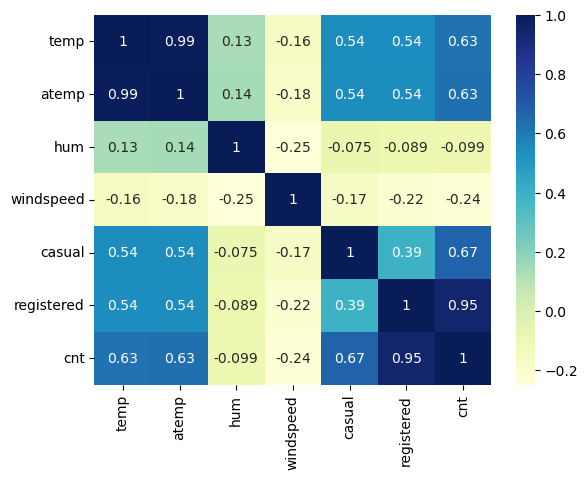

In [137]:
# Visualising the correlation between numerical varibles
sns.heatmap(rentals[['temp','atemp','hum','windspeed','casual','registered','cnt']].corr(),annot=True,cmap="YlGnBu")
plt.show()

Inferences from the above Heat Map
1. 'casual' and 'registered' are highly correlated with 'cnt'. This is expected as 'cnt' is the sum of the other two variabls
2. 'temp' and 'atemp' are equally correlated with 'cnt'. So, we will consider only 'atemp' and drop 'temp'

In [140]:
#Dropping the columns that are of no significance.
rentals.drop(['instant','dteday','temp','casual','registered'],axis=1,inplace=True)


In [142]:
rentals.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist + Cloudy,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist + Cloudy,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear + Partly Cloudy,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear + Partly Cloudy,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear + Partly Cloudy,11.46350,43.6957,12.522300,1600


## 2.3 Numerical Vs Categorical

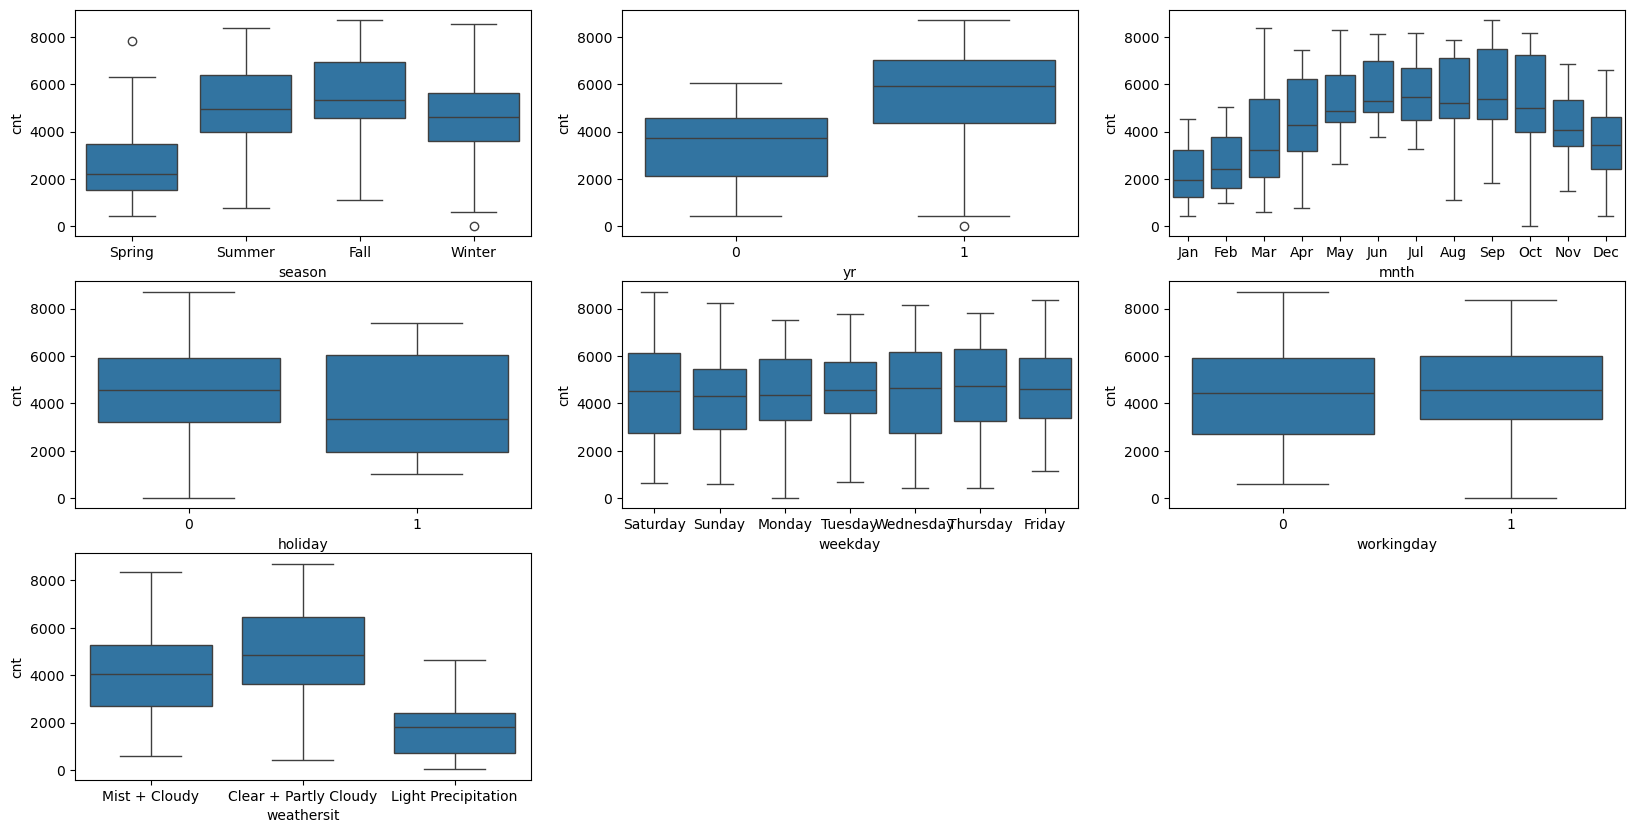

In [144]:
# Data visualisation of Categorical variables.

plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=rentals)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=rentals)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=rentals)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=rentals)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=rentals)
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=rentals)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=rentals)
plt.show()

### Inference from the above plots

1. Most bikes were rented in Fall Season
2. Most bikes were rented from May to October month
3. Most bikes were rented in 2019 year
4. Also, most bikes were rented in 'Cloudy and partly cloudy weather condition' and very less bikes were rented when there is light precipitation.



# 3. Model Creation 


In [148]:
# Creating a copy of rentals dataset for model creating
df_rentals = pd.get_dummies(rentals, columns=["mnth","season","weekday","weathersit"],drop_first=True)
df_rentals.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,...,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Precipitation,weathersit_Mist + Cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,0,0,0,17.68695,69.6087,16.652113,801,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,0,1,9.47025,43.7273,16.636703,1349,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,10.60610,59.0435,10.739832,1562,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,11.46350,43.6957,12.522300,1600,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [150]:
df_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              730 non-null    object 
 1   holiday                         730 non-null    object 
 2   workingday                      730 non-null    object 
 3   atemp                           730 non-null    float64
 4   hum                             730 non-null    float64
 5   windspeed                       730 non-null    float64
 6   cnt                             730 non-null    int64  
 7   mnth_Aug                        730 non-null    bool   
 8   mnth_Dec                        730 non-null    bool   
 9   mnth_Feb                        730 non-null    bool   
 10  mnth_Jan                        730 non-null    bool   
 11  mnth_Jul                        730 non-null    bool   
 12  mnth_Jun                        730 

In [158]:
# Changing all the above datatypes to integers from bool

df_rentals = df_rentals.apply(pd.to_numeric)
df_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              730 non-null    int64  
 1   holiday                         730 non-null    int64  
 2   workingday                      730 non-null    int64  
 3   atemp                           730 non-null    float64
 4   hum                             730 non-null    float64
 5   windspeed                       730 non-null    float64
 6   cnt                             730 non-null    int64  
 7   mnth_Aug                        730 non-null    bool   
 8   mnth_Dec                        730 non-null    bool   
 9   mnth_Feb                        730 non-null    bool   
 10  mnth_Jan                        730 non-null    bool   
 11  mnth_Jul                        730 non-null    bool   
 12  mnth_Jun                        730 

In [160]:
boolean_cols = ["mnth_Aug", "mnth_Dec", "mnth_Feb", "mnth_Jan", "mnth_Jul", "mnth_Jun", "mnth_Mar",
    "mnth_May", "mnth_Nov", "mnth_Oct", "mnth_Sep", "season_Spring", "season_Summer",
    "season_Winter", "weekday_Monday", "weekday_Saturday", "weekday_Sunday", 
    "weekday_Thursday", "weekday_Tuesday", "weekday_Wednesday", 
    "weathersit_Light Precipitation", "weathersit_Mist + Cloudy"]

df_rentals[boolean_cols] = df_rentals[boolean_cols].astype('uint8')


In [162]:
df_rentals.dtypes

yr                                  int64
holiday                             int64
workingday                          int64
atemp                             float64
hum                               float64
windspeed                         float64
cnt                                 int64
mnth_Aug                            uint8
mnth_Dec                            uint8
mnth_Feb                            uint8
mnth_Jan                            uint8
mnth_Jul                            uint8
mnth_Jun                            uint8
mnth_Mar                            uint8
mnth_May                            uint8
mnth_Nov                            uint8
mnth_Oct                            uint8
mnth_Sep                            uint8
season_Spring                       uint8
season_Summer                       uint8
season_Winter                       uint8
weekday_Monday                      uint8
weekday_Saturday                    uint8
weekday_Sunday                    

## 3.1 Dividing the data into Train and Test Data

In [164]:
rentals_train, rentals_test = train_test_split(df_rentals,train_size=0.70, random_state=100)
print(rentals_train.shape)
print(rentals_test.shape)

(510, 29)
(220, 29)


In [166]:
df_rentals.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,...,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Precipitation,weathersit_Mist + Cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## 3.2 Feature Scaling : Min-Max scaling

In [174]:
# Rescaling atemp, hum, windspeed and cnt in df_train

scaler = MinMaxScaler()
rentals_train[['atemp','hum','windspeed','cnt']] = scaler.fit_transform(rentals_train[['atemp','hum','windspeed','cnt']])

#Rescaling the test set as well 
rentals_test[['atemp','hum','windspeed','cnt']] = scaler.fit_transform(rentals_test[['atemp','hum','windspeed','cnt']])


In [176]:
rentals_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,...,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Precipitation,weathersit_Mist + Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.247059,0.247059,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.431725,0.431725,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature scaling is done . All values are converted between 0 and 1.

In [179]:
# Dividing rentals_train into X and y for model building

y_train = rentals_train.pop('cnt')
X_train = rentals_train

# Similarly, for rentals_test dataset
y_test = rentals_test.pop('cnt')
X_test = rentals_test

# Model Building

## Model 0

In [182]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)


model0 = sm.OLS(y_train,X_train_sm)
result0 = model0.fit()
result0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.4
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          1.07e-179
Time:                        23:36:52   Log-Likelihood:                 523.21
No. Observations:                 510   AIC:                            -990.4
Df Residuals:                     482   BIC:                            -871.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2594      0.035      7.397      0.000       0.190       0.328
yr                                 0.2344      0.008     28.934      0.000       0.218       0.250
holiday                            0.0212      0.024      0.882      0.378      -0.026       0.068
workingday                         0.1004      0.012      8.176      0.000       0.076       0.124
atemp                              0.4160      0.045      9.174      0.000       0.327       0.505
hum                               -0.1459      0.039     -3.761      0.000      -0.222      -0.070
windspeed                         -0.1683      0.026     -6.488      0.000      -0.219      -0.117
mnth_Aug                           0.0419      0.033      1.257      0.209      -0.024       0.107
mnth_Dec                          -0.0526      0.034     -1.560      0.120      -0.119       0.014
mnth_Feb                          -0.0404      0.033     -1.221      0.223      -0.105       0.025
mnth_Jan                          -0.0736      0.034     -2.188      0.029      -0.140      -0.007
mnth_Jul                          -0.0147      0.035     -0.424      0.672      -0.083       0.053
mnth_Jun                           0.0242      0.024      1.000      0.318      -0.023       0.072
mnth_Mar                          -0.0003      0.025     -0.014      0.989      -0.049       0.048
mnth_May                           0.0363      0.021      1.734      0.084      -0.005       0.077
mnth_Nov                          -0.0457      0.037     -1.249      0.212      -0.118       0.026
mnth_Oct                           0.0076      0.036      0.210      0.833      -0.063       0.079
mnth_Sep                           0.0957      0.032      2.984      0.003       0.033       0.159
season_Spring                     -0.0519      0.030     -1.724      0.085      -0.111       0.007
season_Summer                      0.0348      0.026      1.327      0.185      -0.017       0.086
season_Winter                      0.1015      0.028      3.612      0.000       0.046       0.157
weekday_Monday                    -0.0263      0.015     -1.702      0.089      -0.057       0.004
weekday_Saturday                   0.0961      0.014      6.934      0.000       0.069       0.123
weekday_Sunday                     0.0417      0.014      2.964      0.003       0.014       0.069
weekday_Thursday                  -0.0131      0.016     -0.835      0.404      -0.044       0.018
weekday_Tuesday                   -0.0214      0.016     -1.368      0.172      -0.052       0.009
weekday_Wednesday                 -0.0082      0.015     -0.545      0.586      -0.038       0.021
weathersit_Light Precipitation    -0.2530      0.027     -9.497      0.000      -0.305      -0.201
weathersit_Mis

## Observations

Lot of variables have p-values > 0.05 indicating that they are not statistically significant.
So, we will have to perform Feature Selection to identify the most significant features

## 3.3 Feature selection using RFE and Manual Selection

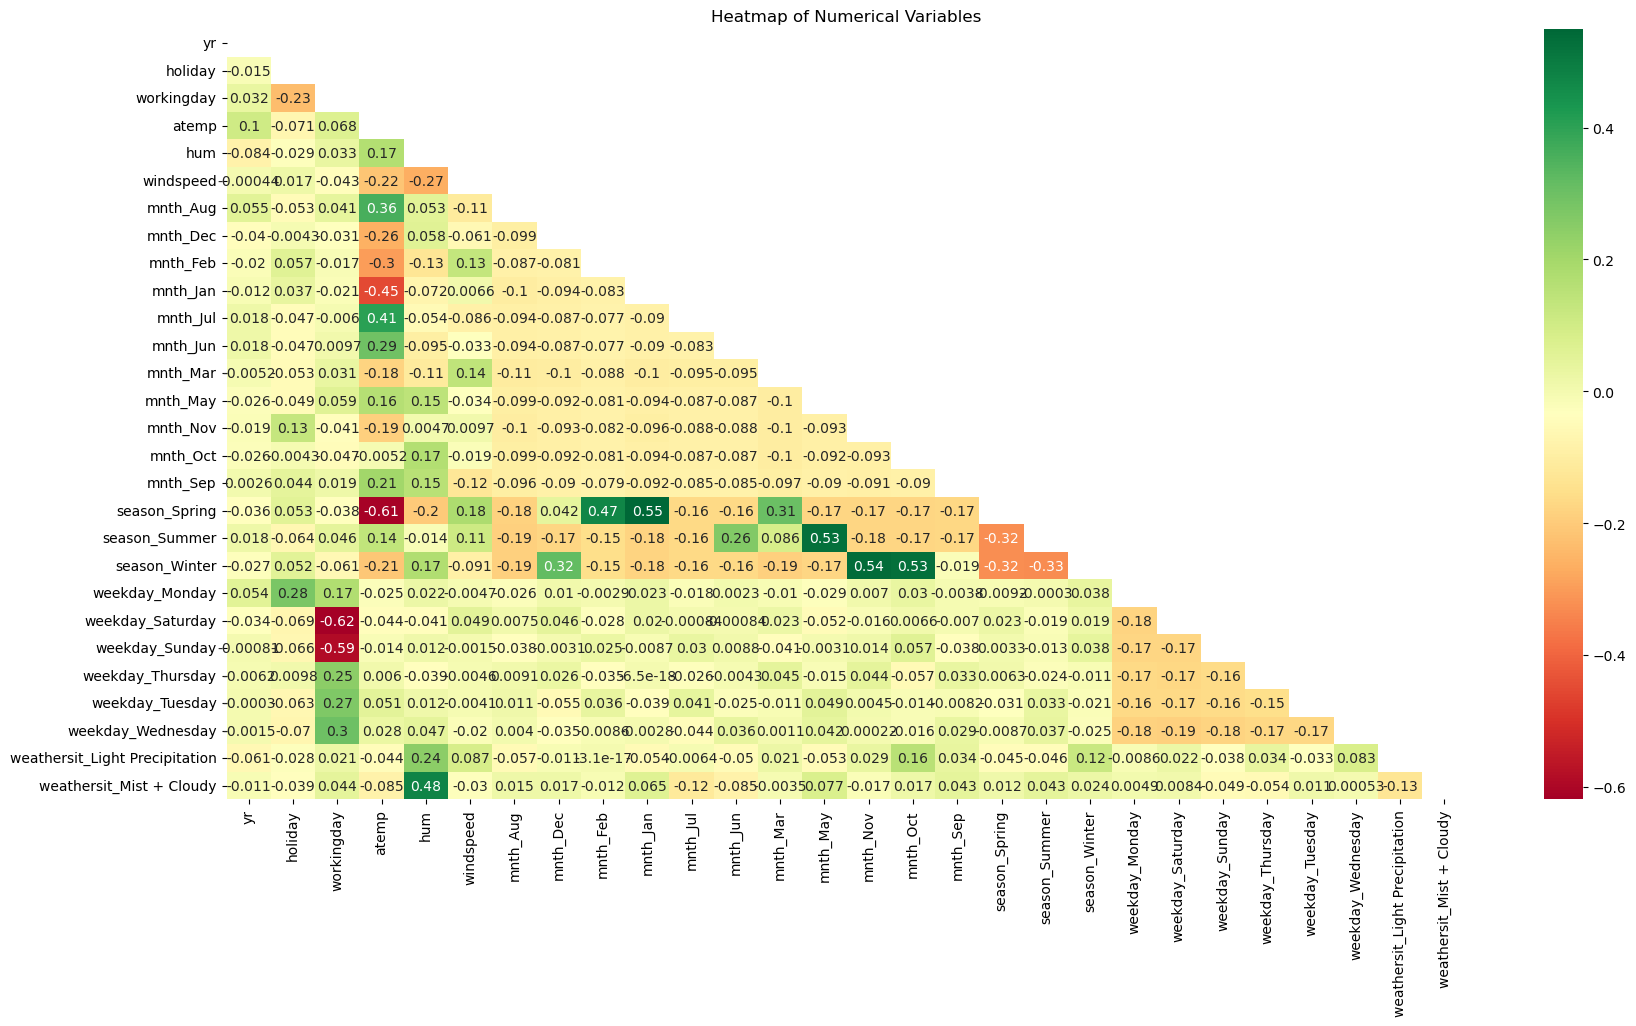

In [187]:
# Manual Feature selection

plt.figure(figsize=[20,10])
mask = np.triu(X_train.corr())
sns.heatmap(X_train.corr(),mask=mask,annot=True,cmap="RdYlGn")
plt.title('Heatmap of Numerical Variables')
plt.show()

## 3.4 RFE Feature Selection Method

In [224]:
lr = LinearRegression()

selector = RFE(lr, n_features_to_select=20)
selector = selector.fit(X_train, y_train)

selected_features = X_train.columns[selector.support_]
X_train_new = X_train[selected_features]
X_test_new = X_test[selected_features]


In [226]:
print(X_train_new.shape)
print(X_test_new.shape)

(510, 20)
(220, 20)


## 3.5 Model Building using the selected features

In [301]:
def calculate_vif(X_train):    
    # Initialize a DataFrame to store VIF values
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_train.columns

    # Calculate VIF for each feature
    vif_data["VIF"] = [
        variance_inflation_factor(X_train.values, i) 
        for i in range(len(X_train.columns))
    ]
    
    # Sort VIF values in descending order
    vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
    return vif_data

In [228]:
X_train_new_sm = sm.add_constant(X_train_new)
X_test_new_sm = sm.add_constant(X_test_new)

model1 = sm.OLS(y_train,X_train_new_sm)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.5
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          4.11e-186
Time:                        21:21:51   Log-Likelihood:                 521.03
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     489   BIC:                            -911.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2987      0.039      7.716      0.000       0.223       0.375
yr                                 0.2338      0.008     29.059      0.000       0.218       0.250
holiday                           -0.0415      0.027     -1.528      0.127      -0.095       0.012
workingday                         0.0449      0.012      3.882      0.000       0.022       0.068
atemp                              0.4066      0.041      9.931      0.000       0.326       0.487
hum                               -0.1470      0.038     -3.852      0.000      -0.222      -0.072
windspeed                         -0.1683      0.026     -6.533      0.000      -0.219      -0.118
mnth_Aug                           0.0528      0.018      2.965      0.003       0.018       0.088
mnth_Dec                          -0.0568      0.018     -3.104      0.002      -0.093      -0.021
mnth_Feb                          -0.0431      0.022     -1.994      0.047      -0.086      -0.001
mnth_Jan                          -0.0768      0.021     -3.576      0.000      -0.119      -0.035
mnth_Jun                           0.0307      0.018      1.716      0.087      -0.004       0.066
mnth_May                           0.0400      0.019      2.155      0.032       0.004       0.076
mnth_Nov                          -0.0510      0.019     -2.693      0.007      -0.088      -0.014
mnth_Sep                           0.1030      0.018      5.852      0.000       0.068       0.138
season_Spring                     -0.0434      0.023     -1.924      0.055      -0.088       0.001
season_Summer                      0.0404      0.018      2.197      0.029       0.004       0.077
season_Winter                      0.1131      0.019      6.113      0.000       0.077       0.149
weekday_Saturday                   0.0539      0.015      3.698      0.000       0.025       0.083
weathersit_Light Precipitation    -0.2516      0.026     -9.519      0.000      -0.304      -0.200
weathersit_Mist + Cloudy          -0.0603      0.010     -5.791      0.000      -0.081      -0.040
==============================================================================
Omnibus:                       83.994   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              264.234
Skew:                          -0.759   Prob(JB):                     4.19e-58
Kurtosis:                       6.183   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check VIF Scores

In [303]:
vif_result = calculate_vif(X_train_new_sm)
print(vif_result)

                           Feature        VIF
0                            const  68.625165
1                            atemp   2.842205
2                    season_Winter   2.359845
3                         mnth_Jan   2.252368
4                              hum   1.913364
5                    season_Summer   1.829253
6                         mnth_Nov   1.751988
7                         mnth_Feb   1.718152
8                       workingday   1.658949
9                 weekday_Saturday   1.656634
10                        mnth_Dec   1.640407
11        weathersit_Mist + Cloudy   1.572784
12                        mnth_Aug   1.449672
13                        mnth_Sep   1.271427
14  weathersit_Light Precipitation   1.268488
15                       windspeed   1.215183
16                              yr   1.032846


### Let us drop 'holiday' as the p-value is very high

In [233]:
X_train_new_sm = X_train_new_sm.drop(['holiday'],axis=1)
X_test_new_sm = X_test_new_sm.drop(['holiday'],axis=1)

In [235]:
model2 = sm.OLS(y_train,X_train_new_sm)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     144.2
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          1.07e-186
Time:                        21:24:10   Log-Likelihood:                 519.81
No. Observations:                 510   AIC:                            -999.6
Df Residuals:                     490   BIC:                            -914.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2943      0.039      7.612      0.000       0.218       0.370
yr                                 0.2340      0.008     29.048      0.000       0.218       0.250
workingday                         0.0509      0.011      4.689      0.000       0.030       0.072
atemp                              0.4043      0.041      9.869      0.000       0.324       0.485
hum                               -0.1460      0.038     -3.820      0.000      -0.221      -0.071
windspeed                         -0.1686      0.026     -6.537      0.000      -0.219      -0.118
mnth_Aug                           0.0527      0.018      2.956      0.003       0.018       0.088
mnth_Dec                          -0.0580      0.018     -3.168      0.002      -0.094      -0.022
mnth_Feb                          -0.0447      0.022     -2.067      0.039      -0.087      -0.002
mnth_Jan                          -0.0784      0.021     -3.648      0.000      -0.121      -0.036
mnth_Jun                           0.0317      0.018      1.767      0.078      -0.004       0.067
mnth_May                           0.0408      0.019      2.198      0.028       0.004       0.077
mnth_Nov                          -0.0546      0.019     -2.901      0.004      -0.092      -0.018
mnth_Sep                           0.1009      0.018      5.743      0.000       0.066       0.135
season_Spring                     -0.0445      0.023     -1.969      0.050      -0.089   -8.83e-05
season_Summer                      0.0394      0.018      2.141      0.033       0.003       0.076
season_Winter                      0.1130      0.019      6.098      0.000       0.077       0.149
weekday_Saturday                   0.0600      0.014      4.276      0.000       0.032       0.088
weathersit_Light Precipitation    -0.2513      0.026     -9.495      0.000      -0.303      -0.199
weathersit_Mist + Cloudy          -0.0602      0.010     -5.769      0.000      -0.081      -0.040
==============================================================================
Omnibus:                       89.602   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.468
Skew:                          -0.799   Prob(JB):                     3.10e-64
Kurtosis:                       6.348   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking the VIF scores

In [305]:
vif_result = calculate_vif(X_train_new_sm)
print(vif_result)

                           Feature        VIF
0                            const  68.625165
1                            atemp   2.842205
2                    season_Winter   2.359845
3                         mnth_Jan   2.252368
4                              hum   1.913364
5                    season_Summer   1.829253
6                         mnth_Nov   1.751988
7                         mnth_Feb   1.718152
8                       workingday   1.658949
9                 weekday_Saturday   1.656634
10                        mnth_Dec   1.640407
11        weathersit_Mist + Cloudy   1.572784
12                        mnth_Aug   1.449672
13                        mnth_Sep   1.271427
14  weathersit_Light Precipitation   1.268488
15                       windspeed   1.215183
16                              yr   1.032846


### Let us drop 'holiday' column based on its high p-value

In [239]:
X_train_new_sm = X_train_new_sm.drop(['mnth_Jun'],axis=1)
X_test_new_sm = X_test_new_sm.drop(['mnth_Jun'],axis=1)

In [241]:
# model3 

model3 = sm.OLS(y_train,X_train_new_sm)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.4
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          4.04e-187
Time:                        21:24:47   Log-Likelihood:                 518.19
No. Observations:                 510   AIC:                            -998.4
Df Residuals:                     491   BIC:                            -917.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2877      0.039      7.460      0.000       0.212       0.363
yr                                 0.2332      0.008     28.932      0.000       0.217       0.249
workingday                         0.0510      0.011      4.684      0.000       0.030       0.072
atemp                              0.4285      0.039     11.072      0.000       0.352       0.505
hum                               -0.1519      0.038     -3.982      0.000      -0.227      -0.077
windspeed                         -0.1712      0.026     -6.635      0.000      -0.222      -0.121
mnth_Aug                           0.0462      0.017      2.641      0.009       0.012       0.081
mnth_Dec                          -0.0548      0.018     -3.004      0.003      -0.091      -0.019
mnth_Feb                          -0.0415      0.022     -1.925      0.055      -0.084       0.001
mnth_Jan                          -0.0736      0.021     -3.446      0.001      -0.116      -0.032
mnth_May                           0.0293      0.017      1.682      0.093      -0.005       0.064
mnth_Nov                          -0.0523      0.019     -2.778      0.006      -0.089      -0.015
mnth_Sep                           0.0966      0.017      5.542      0.000       0.062       0.131
season_Spring                     -0.0430      0.023     -1.900      0.058      -0.087       0.001
season_Summer                      0.0475      0.018      2.660      0.008       0.012       0.083
season_Winter                      0.1128      0.019      6.076      0.000       0.076       0.149
weekday_Saturday                   0.0602      0.014      4.279      0.000       0.033       0.088
weathersit_Light Precipitation    -0.2509      0.027     -9.458      0.000      -0.303      -0.199
weathersit_Mist + Cloudy          -0.0597      0.010     -5.715      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       88.355   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.836
Skew:                          -0.802   Prob(JB):                     1.27e-60
Kurtosis:                       6.226   Cond. No.                         24.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF values

In [307]:
vif_result = calculate_vif(X_train_new_sm)
print(vif_result)

                           Feature        VIF
0                            const  68.625165
1                            atemp   2.842205
2                    season_Winter   2.359845
3                         mnth_Jan   2.252368
4                              hum   1.913364
5                    season_Summer   1.829253
6                         mnth_Nov   1.751988
7                         mnth_Feb   1.718152
8                       workingday   1.658949
9                 weekday_Saturday   1.656634
10                        mnth_Dec   1.640407
11        weathersit_Mist + Cloudy   1.572784
12                        mnth_Aug   1.449672
13                        mnth_Sep   1.271427
14  weathersit_Light Precipitation   1.268488
15                       windspeed   1.215183
16                              yr   1.032846


### Observations

The p-values for all the features in model3 is < 0.05 
Also, the VIF of all the features are < 5. 

So, we can conclude that this model3 is optimal

In [245]:
# Dropping 'mnth_May' based on it's p-value

X_train_new_sm = X_train_new_sm.drop(['mnth_May'],axis=1)
X_test_new_sm = X_test_new_sm.drop(['mnth_May'],axis=1)
model4 = sm.OLS(y_train,X_train_new_sm)
result4 = model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.6
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          1.28e-187
Time:                        21:27:15   Log-Likelihood:                 516.73
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     492   BIC:                            -921.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2754      0.038      7.260      0.000       0.201       0.350
yr                                 0.2325      0.008     28.831      0.000       0.217       0.248
workingday                         0.0513      0.011      4.706      0.000       0.030       0.073
atemp                              0.4387      0.038     11.457      0.000       0.363       0.514
hum                               -0.1436      0.038     -3.790      0.000      -0.218      -0.069
windspeed                         -0.1731      0.026     -6.699      0.000      -0.224      -0.122
mnth_Aug                           0.0460      0.018      2.627      0.009       0.012       0.080
mnth_Dec                          -0.0534      0.018     -2.924      0.004      -0.089      -0.018
mnth_Feb                          -0.0400      0.022     -1.854      0.064      -0.082       0.002
mnth_Jan                          -0.0719      0.021     -3.361      0.001      -0.114      -0.030
mnth_Nov                          -0.0505      0.019     -2.681      0.008      -0.087      -0.013
mnth_Sep                           0.0965      0.017      5.526      0.000       0.062       0.131
season_Spring                     -0.0388      0.023     -1.723      0.086      -0.083       0.005
season_Summer                      0.0596      0.016      3.640      0.000       0.027       0.092
season_Winter                      0.1149      0.019      6.190      0.000       0.078       0.151
weekday_Saturday                   0.0598      0.014      4.245      0.000       0.032       0.088
weathersit_Light Precipitation    -0.2533      0.027     -9.545      0.000      -0.305      -0.201
weathersit_Mist + Cloudy          -0.0600      0.010     -5.732      0.000      -0.081      -0.039
==============================================================================
Omnibus:                       85.574   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.975
Skew:                          -0.797   Prob(JB):                     3.17e-55
Kurtosis:                       6.045   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF Values

In [309]:
vif_result = calculate_vif(X_train_new_sm)
print(vif_result)

                           Feature        VIF
0                            const  68.625165
1                            atemp   2.842205
2                    season_Winter   2.359845
3                         mnth_Jan   2.252368
4                              hum   1.913364
5                    season_Summer   1.829253
6                         mnth_Nov   1.751988
7                         mnth_Feb   1.718152
8                       workingday   1.658949
9                 weekday_Saturday   1.656634
10                        mnth_Dec   1.640407
11        weathersit_Mist + Cloudy   1.572784
12                        mnth_Aug   1.449672
13                        mnth_Sep   1.271427
14  weathersit_Light Precipitation   1.268488
15                       windspeed   1.215183
16                              yr   1.032846


In [250]:
# Dropping 'season_Spring' based on it's high p-value
X_train_new_sm = X_train_new_sm.drop(['season_Spring'],axis=1)
X_test_new_sm = X_test_new_sm.drop(['season_Spring'],axis=1)
model5 = sm.OLS(y_train,X_train_new_sm)
result5 = model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     168.7
Date:                Tue, 26 Nov 2024   Prob (F-statistic):          4.22e-188
Time:                        21:28:59   Log-Likelihood:                 515.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     493   BIC:                            -924.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2426      0.033      7.380      0.000       0.178       0.307
yr                                 0.2317      0.008     28.722      0.000       0.216       0.248
workingday                         0.0511      0.011      4.681      0.000       0.030       0.073
atemp                              0.4763      0.032     15.107      0.000       0.414       0.538
hum                               -0.1518      0.038     -4.030      0.000      -0.226      -0.078
windspeed                         -0.1769      0.026     -6.859      0.000      -0.228      -0.126
mnth_Aug                           0.0575      0.016      3.549      0.000       0.026       0.089
mnth_Dec                          -0.0525      0.018     -2.871      0.004      -0.088      -0.017
mnth_Feb                          -0.0500      0.021     -2.399      0.017      -0.091      -0.009
mnth_Jan                          -0.0792      0.021     -3.772      0.000      -0.120      -0.038
mnth_Nov                          -0.0463      0.019     -2.476      0.014      -0.083      -0.010
mnth_Sep                           0.1068      0.016      6.487      0.000       0.074       0.139
season_Summer                      0.0780      0.012      6.271      0.000       0.054       0.102
season_Winter                      0.1357      0.014      9.601      0.000       0.108       0.163
weekday_Saturday                   0.0593      0.014      4.203      0.000       0.032       0.087
weathersit_Light Precipitation    -0.2487      0.026     -9.402      0.000      -0.301      -0.197
weathersit_Mist + Cloudy          -0.0589      0.010     -5.626      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       78.325   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.250
Skew:                          -0.743   Prob(JB):                     1.49e-48
Kurtosis:                       5.856   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculating VIF values

In [311]:
vif_result = calculate_vif(X_train_new_sm)
print(vif_result)

                           Feature        VIF
0                            const  68.625165
1                            atemp   2.842205
2                    season_Winter   2.359845
3                         mnth_Jan   2.252368
4                              hum   1.913364
5                    season_Summer   1.829253
6                         mnth_Nov   1.751988
7                         mnth_Feb   1.718152
8                       workingday   1.658949
9                 weekday_Saturday   1.656634
10                        mnth_Dec   1.640407
11        weathersit_Mist + Cloudy   1.572784
12                        mnth_Aug   1.449672
13                        mnth_Sep   1.271427
14  weathersit_Light Precipitation   1.268488
15                       windspeed   1.215183
16                              yr   1.032846


### Inference
1. The p-values of all the predictors are less than 0.05
2. VIF of all the variables are < 5

So, this shows that the model5 is the best possible model 

## 3.6 Residual Analysis

In [264]:
# 1.Predicting the Y_train value(Count) using the model
y_train_pred = result5.predict(X_train_new_sm)
y_train_pred.head()

576    0.733484
426    0.541484
728    0.324310
482    0.629448
111    0.283218
dtype: float64

In [266]:
# 2.Calculating Residual value
residual = y_train - y_train_pred
residual.head()

576    0.094173
426   -0.076229
728   -0.120214
482   -0.146475
111   -0.092122
dtype: float64

C:\Users\Mohan\AppData\Local\Temp\ipykernel_2784\1450478821.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


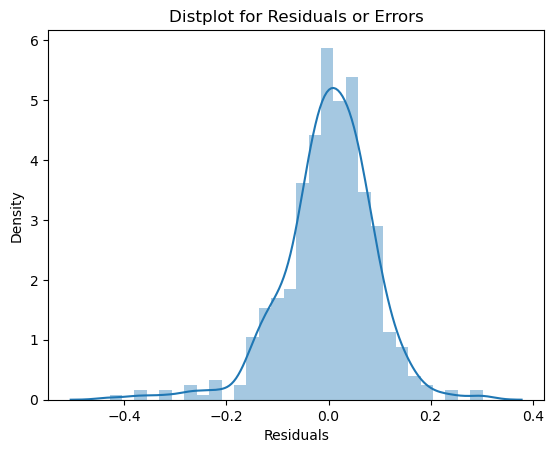

In [276]:
# 3.Visualising the residual value to check if the model not failing any conditions
sns.distplot(residual)
plt.xlabel('Residuals' )
plt.title('Distplot for Residuals or Errors')                 
plt.show()

### Observations:

1. The way the errors (residuals) are spread shows that the linear regression model works well with the data. The errors are mostly normal and centered around zero, which is a good sign.
2. The errors are evenly spread around zero, meaning the model isn’t biased and makes predictions fairly.
3. The spread of the errors stays the same, which means the model's predictions are consistent no matter the input values.

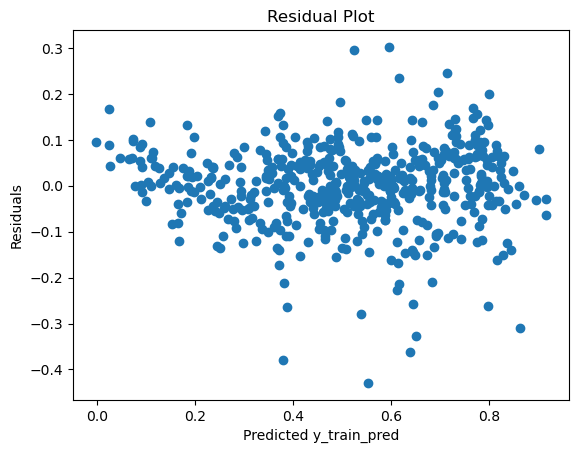

In [280]:
### To verify the Linear Regression assumptions, let us plot a scatter plot of residuals

plt.scatter(y_train_pred, residual)
plt.xlabel('Predicted y_train_pred')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### Observations: 
1. The errors (residuals) are scattered randomly around zero, showing that the model isn’t biased and is doing a good job of following the data pattern.
2. The spread of the errors stays the same across predictions, which is good because it means the model is consistent and reliable.
3. There are no clear patterns in the errors, which means they don’t depend on each other, meeting an important rule for linear regression.

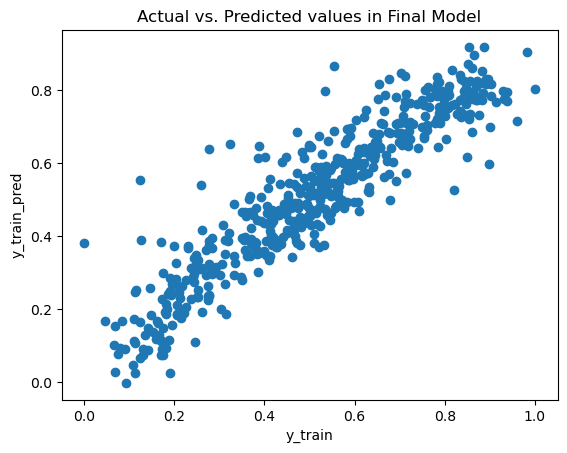

In [285]:
#In Order to view how closely our predicted values align with actual values, We can plot scatterplot between y_train and y_train_pred

plt.scatter(y_train, y_train_pred)
plt.xlabel('y_train')
plt.ylabel('y_train_pred')
plt.title('Actual vs. Predicted values in Final Model')
plt.show()

### Observation
The above scatter plot clearly shows that, the predicted values of y very much aligns with the actual y values. 
This means, our model fits very well 

C:\Users\Mohan\AppData\Local\Temp\ipykernel_2784\3121378407.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, color='green', label = 'y_train')
C:\Users\Mohan\AppData\Local\Temp\ipykernel_2784\3121378407.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train_pred, color='red', la

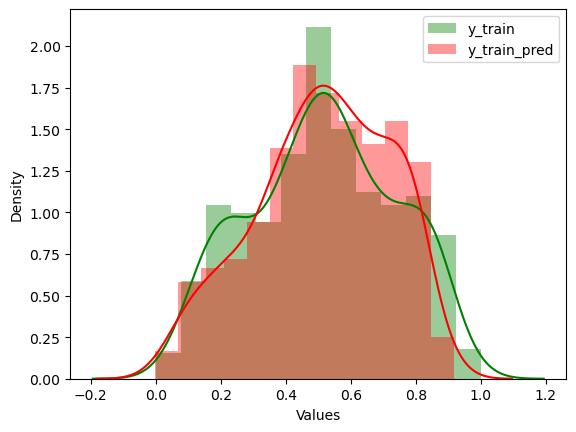

In [294]:
## To visualize the distribution of y_train and y_train_pred, we can plot the distplots

sns.distplot(y_train, color='green', label = 'y_train')
sns.distplot(y_train_pred, color='red', label = 'y_train_pred')
plt.xlabel("Values")
plt.legend()
plt.show()

### Observations

The tails of both distributions cover almost the same range. So, we can conclude that the model y_train_pred does not overpredict

# Conclusion

In [299]:
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     168.7
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          4.22e-188
Time:                        00:34:47   Log-Likelihood:                 515.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     493   BIC:                            -924.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2426      0.033      7.380      0.000       0.178       0.307
yr                                 0.2317      0.008     28.722      0.000       0.216       0.248
workingday                         0.0511      0.011      4.681      0.000       0.030       0.073
atemp                              0.4763      0.032     15.107      0.000       0.414       0.538
hum                               -0.1518      0.038     -4.030      0.000      -0.226      -0.078
windspeed                         -0.1769      0.026     -6.859      0.000      -0.228      -0.126
mnth_Aug                           0.0575      0.016      3.549      0.000       0.026       0.089
mnth_Dec                          -0.0525      0.018     -2.871      0.004      -0.088      -0.017
mnth_Feb                          -0.0500      0.021     -2.399      0.017      -0.091      -0.009
mnth_Jan                          -0.0792      0.021     -3.772      0.000      -0.120      -0.038
mnth_Nov                          -0.0463      0.019     -2.476      0.014      -0.083      -0.010
mnth_Sep                           0.1068      0.016      6.487      0.000       0.074       0.139
season_Summer                      0.0780      0.012      6.271      0.000       0.054       0.102
season_Winter                      0.1357      0.014      9.601      0.000       0.108       0.163
weekday_Saturday                   0.0593      0.014      4.203      0.000       0.032       0.087
weathersit_Light Precipitation    -0.2487      0.026     -9.402      0.000      -0.301      -0.197
weathersit_Mist + Cloudy          -0.0589      0.010     -5.626      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       78.325   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.250
Skew:                          -0.743   Prob(JB):                     1.49e-48
Kurtosis:                       5.856   Cond. No.                         20.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the above summary, the equation for the target variable cnt can be written as follows

cnt = 0.2426 
      + 0.2317 * yr 
      + 0.0511 * workingday 
      + 0.4763 * atemp
      - 0.1518 * hum
      - 0.1769 * windspeed
      + 0.0575 * Mnth_Aug
      - 0.0525 * Mnth_Dec
      - 0.0500 * Mnth_Feb
      - 0.0792 * Mnth_Jan
      - 0.0463 * Mnth_Nov
      + 0.1068 * Mnth_Sep
      + 0.0780 * Season_Summer
      + 0.1357 * Season_Winter
      + 0.0593 * weekday_Saturday
      - 0.2487 * weathersit_Light Precipitation	
      - 0.0589 * weathersit_Mist + Cloud
      
      
      

# 4. Model Evaluation

In [351]:
#Predict

y_test_pred = result5.predict(X_test_new_sm)
y_test_pred.head()

184    0.447104
535    0.898485
299    0.408549
221    0.619553
152    0.597201
dtype: float64

In [353]:
r_squared_test = round(r2_score(y_test, y_test_pred), 4)
print(r_squared_test)

0.8194


### Inference
R-squared value of the test dataset is very close to the final model5's R-squared value. 
So, We can conclude that the model performs very well for predicting the target variable in this context


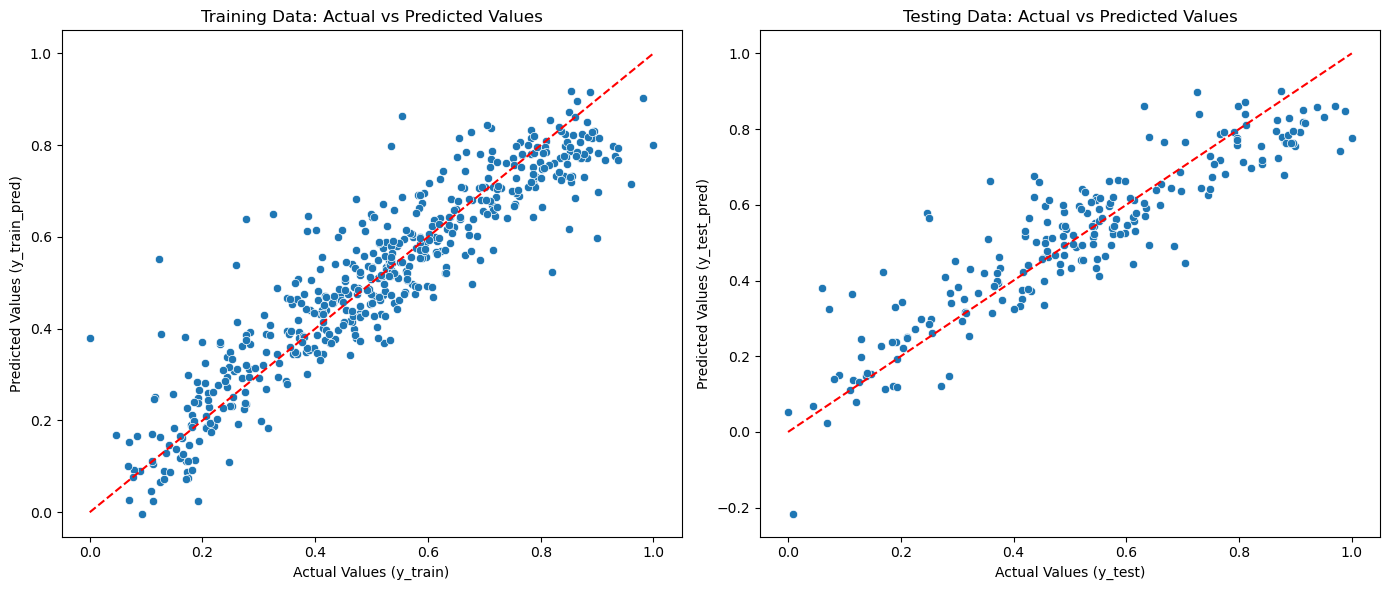

In [356]:
# Let us visualize the spread of y_test vs y_test_pred

# Create a figure with two subplots
plt.figure(figsize=(14, 6))

# Subplot for training data
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred)
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values (y_train_pred)')
plt.title('Training Data: Actual vs Predicted Values')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')  

# Subplot for testing data
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_test_pred)')
plt.title('Testing Data: Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  

# Show the plot
plt.tight_layout()
plt.show()

### Observation : 

y_train and y_train_pred values align strongly
High prediction accuracy is seen at higher values

y_test and y_test_pred values align strongly
Strong prediction accuracy is seen at higher values

# Final Observation: 

High R-squared value : The model that we built has high R-squared value (0.846) on Training dataset and (0.8194) on Testing dataset.
This indicates a strong fit

Temperature: There is a strong positive relationship, with higher temperatures significantly increasing bike demand.

Year 2019: This shows a strong relationship with increase in demand. so, YoY, the demand is increasing

Weather conditions : The bike rental demand is increased when the weather is pleasant 

windspeed and humidity : These two features have negative correlation with the demand cnt. 

Seasonal Effects: Higher demand is observed in Fall , Summer and Winter.
 Monthly Effects: Lower demand in January and July, higher demand in September.- Weekday Monday: Positive effect on bike deman

- Working Day: Increases bike demand.